# importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import openpyxl
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV,TimeSeriesSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import norm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import os
import statsmodels.api as sm
import statsmodels.graphics.api as smg
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import warnings





# assigning file path

In [3]:

file_path = r"C:\Users\Nitro\Downloads\cleaned_weather_data1_1.xlsx"
data = pd.read_excel(file_path)


# listing rows of data along with their information

In [4]:
print("Dataset Head:\n", data.head())
print("\nDataset Info:")
data.info()
     

Dataset Head:
         Date  Temperature (°C)  Dew Point (°C)  Humidity (%)  \
0 2017-01-01              9.97           -3.99            44   
1 2017-01-02             10.96           -3.99            43   
2 2017-01-03             11.96           -4.98            37   
3 2017-01-04             10.96           -6.98            33   
4 2017-01-05              9.97           -8.97            31   

   Wind Speed (kph)  Pressure (Hg) Precipitation (mm)  PM2.5  
0              3.99          29.99               4.68  120.0  
1              5.98          29.99                1.1  134.0  
2              5.98          29.99                0.2  118.0  
3              5.98          29.94                  0  149.0  
4              4.98          29.91                  0  145.0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  ----

  # Check for missing values

In [19]:

print("\nMissing values:\n", data.isnull().sum())
      



Missing values:
 Date                  0
Temperature (°C)      0
Dew Point (°C)        0
Humidity (%)          0
Wind Speed (kph)      0
Pressure (Hg)         0
Precipitation (mm)    0
PM2.5                 0
dtype: int64


   # Drop rows with missing values

In [20]:

data = data.dropna()
data.head()

,Date,Temperature (°C),Dew Point (°C),Humidity (%),Wind Speed (kph),Pressure (Hg),Precipitation (mm),PM2.5
0,2017-01-01,9.97,-3.99,44,3.99,29.99,4.68,120.0
1,2017-01-02,10.96,-3.99,43,5.98,29.99,1.1,134.0
2,2017-01-03,11.96,-4.98,37,5.98,29.99,0.2,118.0
3,2017-01-04,10.96,-6.98,33,5.98,29.94,0,149.0
4,2017-01-05,9.97,-8.97,31,4.98,29.91,0,145.0


# Display column names as well as mean,median,etc.

In [21]:

print("\nColumn Names:\n", data.columns.tolist())
data.describe()

   


Column Names:
 ['Date', 'Temperature (°C)', 'Dew Point (°C)', 'Humidity (%)', 'Wind Speed (kph)', 'Pressure (Hg)', 'Precipitation (mm)', 'PM2.5']


,Date,Temperature (°C),Dew Point (°C),Humidity (%),Wind Speed (kph),Pressure (Hg),PM2.5
count,1461,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,2019-01-01 00:00:00,19.101855,9.429726,65.653662,5.005708,29.797632,116.465770
min,2017-01-01 00:00:00,3.990000,-15.950000,15.000000,1.990000,29.380000,19.000000
25%,2018-01-01 00:00:00,14.950000,2.990000,52.000000,2.990000,29.670000,73.000000
50%,2019-01-01 00:00:00,20.930000,10.960000,69.000000,4.980000,29.820000,120.000000
75%,2020-01-01 00:00:00,22.930000,17.940000,84.000000,5.980000,29.940000,156.000000
max,2020-12-31 00:00:00,29.900000,21.930000,97.000000,9.970000,30.140000,232.000000
std,NaN,5.049782,8.913284,20.558949,1.789120,0.157931,46.428139


# assigning dependent and independent variables

In [22]:

independent_variables = [
    'Temperature (°C)', 
    'Dew Point (°C)', 
    'Humidity (%)', 
    'Wind Speed (kph)', 
    'Pressure (Hg)', 
    'Precipitation (mm)'
]
dependent_variable='PM2.5'

# making scatter plot and line plot side wise  along with correlation coefficient

Correlation between PM2.5 and Temperature (°C): -0.44


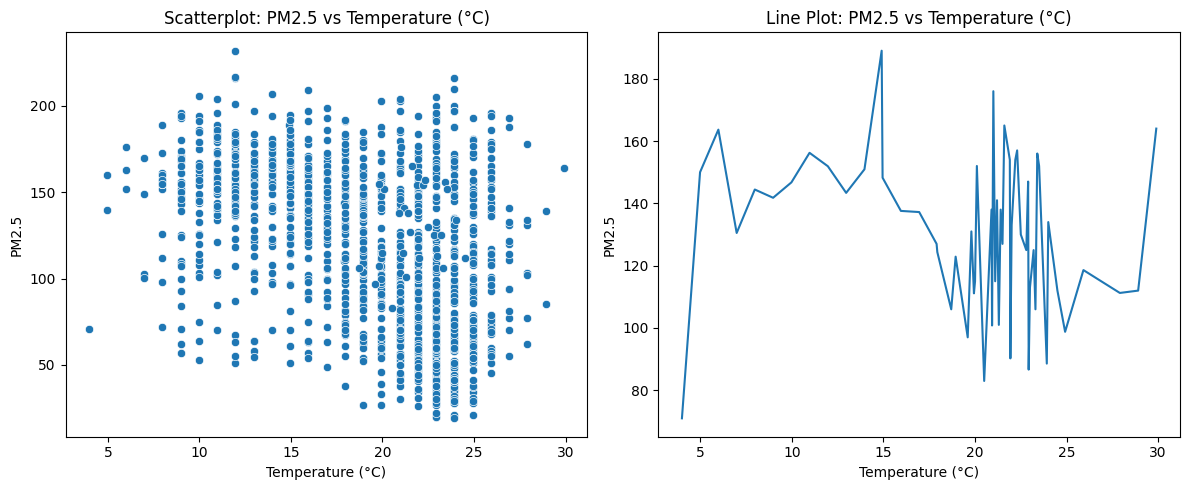

Correlation between PM2.5 and Dew Point (°C): -0.56


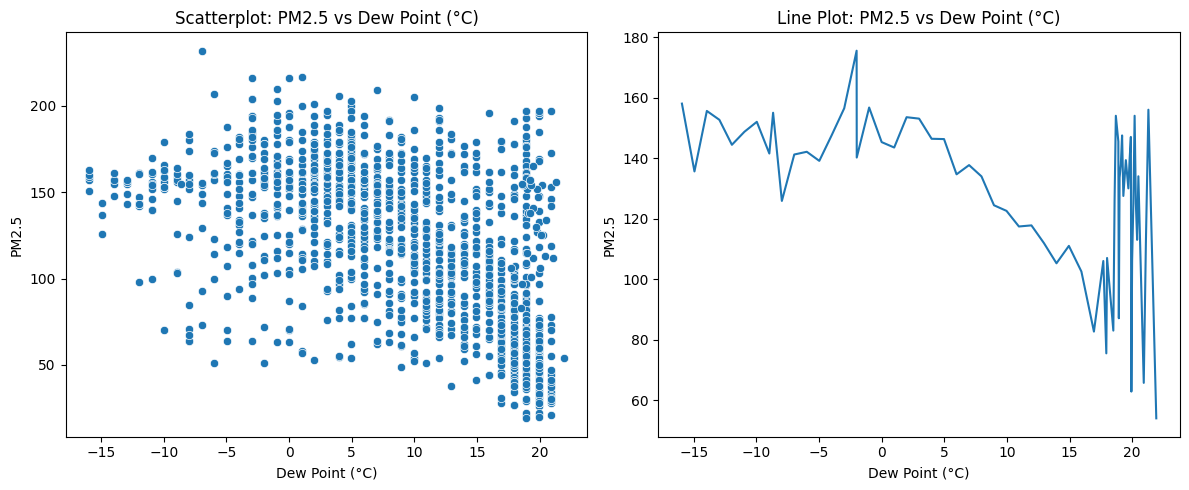

Correlation between PM2.5 and Humidity (%): -0.51


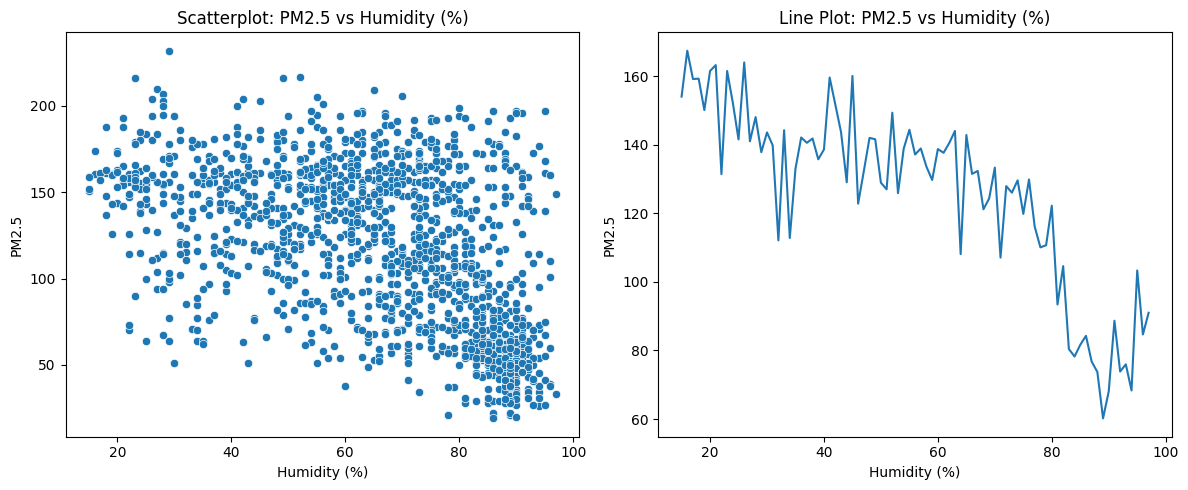

Correlation between PM2.5 and Wind Speed (kph): 0.29


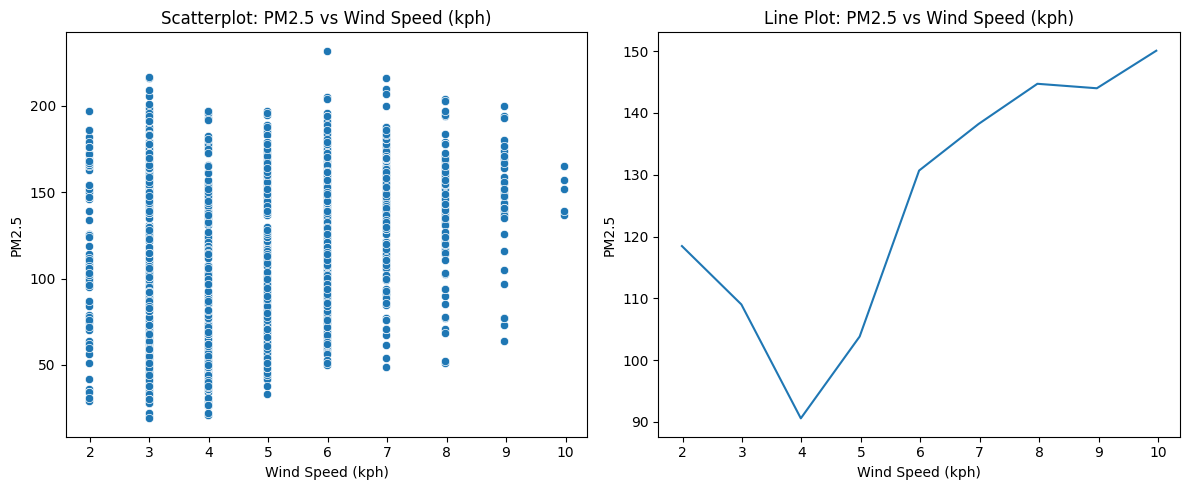

Correlation between PM2.5 and Pressure (Hg): 0.51


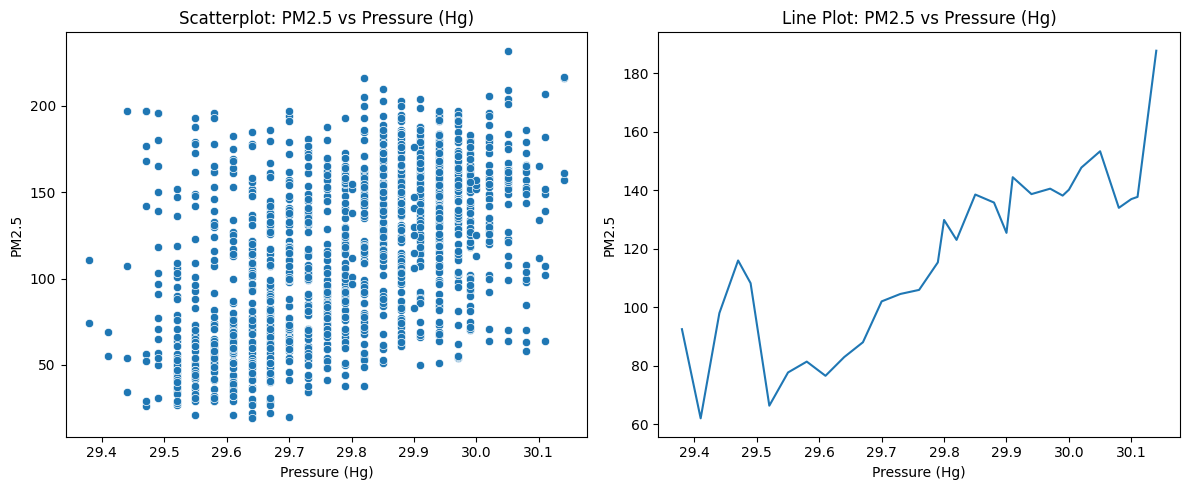

Correlation between PM2.5 and Precipitation (mm): -0.47


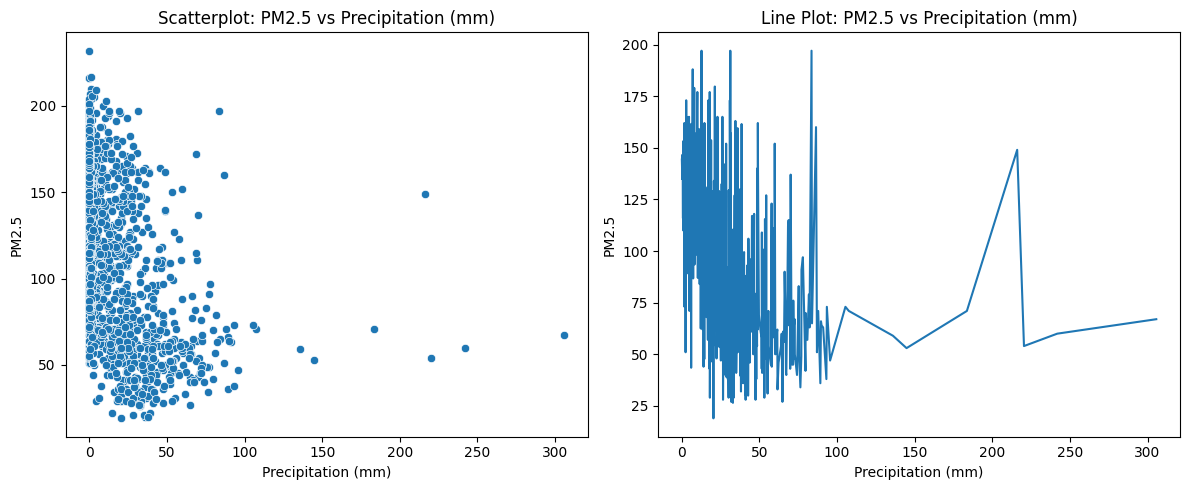

In [23]:
# Ensure data is loaded correctly
if not isinstance(data, pd.DataFrame) or data is None or data.empty:
    raise ValueError("Loaded data is empty or not a valid DataFrame. Please check the file.")

# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Set target column and independent variables
dependent_variable = 'PM2.5'  # Set target column as 'PM2.5'
independent_variables = ['Temperature (°C)', 'Dew Point (°C)', 'Humidity (%)', 'Wind Speed (kph)', 'Pressure (Hg)', 'Precipitation (mm)']

# Check for missing columns
missing_columns = [col for col in [dependent_variable] + independent_variables if col not in data.columns]
if missing_columns:
    print(f"Warning: Missing columns in dataset: {missing_columns}")
    # Remove missing columns from further processing
    independent_variables = [col for col in independent_variables if col in data.columns]

# Convert selected columns to numeric (handling conversion errors)
for col in [dependent_variable] + independent_variables:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with NaN values in the selected columns
data_cleaned = data.dropna(subset=[dependent_variable] + independent_variables)

# Compute correlations and visualize data
correlation_results = {}
for variable in independent_variables:
    correlation = data_cleaned[dependent_variable].corr(data_cleaned[variable])
    correlation_results[variable] = correlation
    print(f"Correlation between {dependent_variable} and {variable}: {correlation:.2f}")

    # Create scatterplot and line plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.scatterplot(ax=axes[0], x=data_cleaned[variable], y=data_cleaned[dependent_variable])
    axes[0].set_title(f"Scatterplot: {dependent_variable} vs {variable}")
    axes[0].set_xlabel(variable)
    axes[0].set_ylabel(dependent_variable)

    # Line plot without confidence interval shadow
    sns.lineplot(ax=axes[1], x=data_cleaned[variable], y=data_cleaned[dependent_variable], errorbar=None)
    axes[1].set_title(f"Line Plot: {dependent_variable} vs {variable}")
    axes[1].set_xlabel(variable)
    axes[1].set_ylabel(dependent_variable)

    plt.tight_layout()
    plt.show()



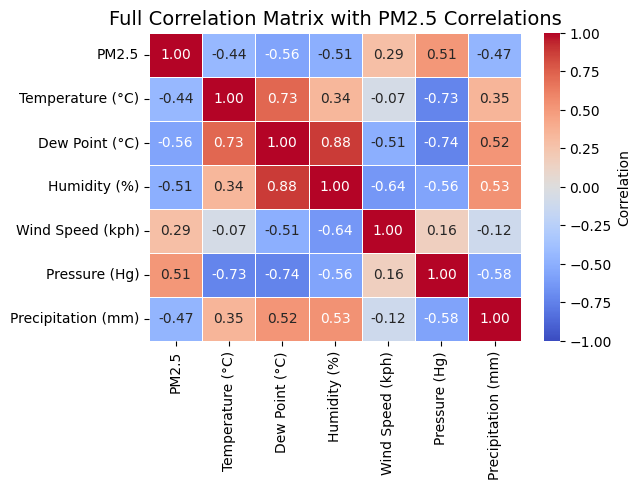

In [24]:
# Generate the full correlation matrix
correlation_matrix = data_cleaned[[dependent_variable] + independent_variables].corr()

# Plot the heatmap with the default 'coolwarm' color map
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1,
            cbar_kws={'label': 'Correlation'}, linewidths=0.5, annot_kws={"size": 10})

# Title for the heatmap
plt.title("Full Correlation Matrix with PM2.5 Correlations", fontsize=14)
plt.show()


# time series analysis 

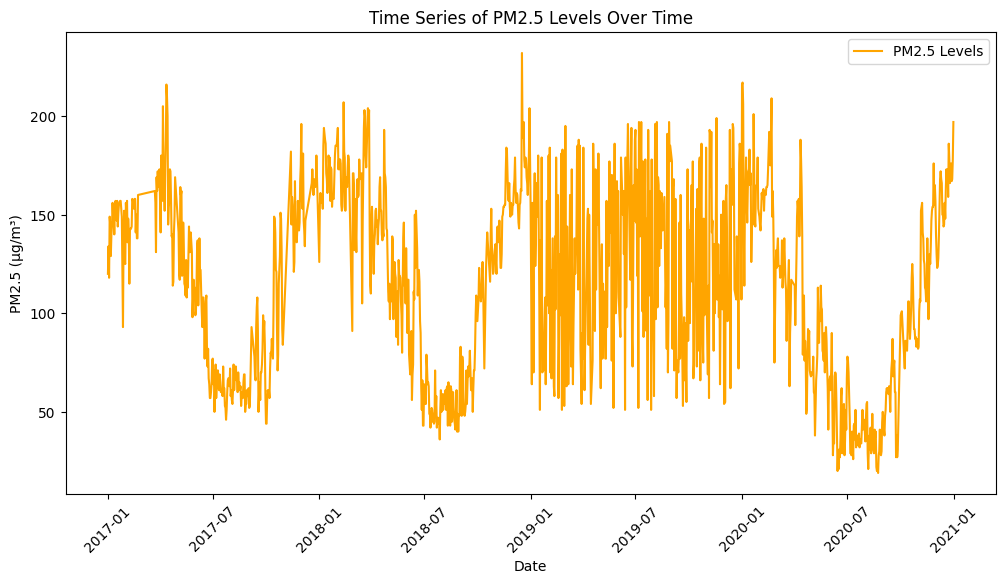

In [25]:
# Plot Time Series: Date vs PM2.5 if 'Date' and 'PM2.5' columns are available
if 'PM2.5' in data.columns and 'Date' in data.columns:
    plt.figure(figsize=(12, 6))

    # Plot PM2.5 levels over time with 'Date' on the x-axis
    plt.plot(data['Date'], data['PM2.5'], label='PM2.5 Levels', color='orange')

    # Add titles and labels
    plt.title('Time Series of PM2.5 Levels Over Time')
    plt.xlabel('Date')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.legend()

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Display plot
    plt.show()


# spliting training data and testing data sets and downloading them

In [26]:

# Select the features (independent variables) and target variable
X = data[['Date', 'Temperature (°C)', 'Dew Point (°C)', 'Humidity (%)', 'Wind Speed (kph)', 'Pressure (Hg)', 'Precipitation (mm)']]
y = data['PM2.5']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine the features (X_train) and target (y_train) to form the complete train set
train_data = X_train.copy()
train_data['PM2.5'] = y_train
# Combine the features (X_test) and target (y_test) to form the complete test set
test_data = X_test.copy()
test_data['PM2.5'] = y_test

# Save the train and test data to a new location 

train_data.to_csv(r'C:\Users\Nitro\Downloads\training_data.csv', index=False)
test_data.to_csv(r'C:\Users\Nitro\Downloads\testing_data.csv', index=False)

print("Training data  as well as testing data has been successfully saved")


Training data  as well as testing data has been successfully saved


# prediction of PM 2.5 in testing data

In [6]:
# Load dataset
data = pd.read_excel("cleaned_weather_data1_1.xlsx")  # Replace with actual file path

# Define independent and dependent variables
independent_vars = [
    "Temperature (°C)", "Dew Point (°C)", "Humidity (%)", "Wind Speed (kph)", "Pressure (Hg)", "Precipitation (mm)"
]  # Updated feature names
dependent_var = "PM2.5"

# Clean the data: Convert all relevant columns to numeric, forcing errors to NaN (which you can handle later)
for col in independent_vars:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill missing values (NaN) with the mean of each column
data.fillna(data.mean(), inplace=True)

# Define the independent (X) and dependent (y) variables
X = data[independent_vars]
y = data[dependent_var]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store predictions from each model
predictions = {}

# 1. Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_test_pred = dt_model.predict(X_test)
predictions["Decision Tree"] = dt_y_test_pred

# 2. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_test_pred = rf_model.predict(X_test)
predictions["Random Forest"] = rf_y_test_pred

# 3. Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr_model.fit(X_train, y_train)
gbr_y_test_pred = gbr_model.predict(X_test)
predictions["Gradient Boosting"] = gbr_y_test_pred

# Convert predictions to DataFrame
predictions_df = pd.DataFrame(predictions)
predictions_df["Actual PM2.5"] = y_test.values

# Display the first 20 rows of predictions
print("\nPredictions:")
print(predictions_df.head(20))




Predictions:
    Decision Tree  Random Forest  Gradient Boosting  Actual PM2.5
0           150.0     126.400000         113.088153    162.000000
1           164.0     131.400000         153.554281    163.000000
2           124.0     142.598276         145.135350    164.000000
3           137.0      92.090000          89.858929     69.000000
4            66.0     104.855000         110.040958     69.000000
5            66.0      74.480000          80.623805     57.000000
6            67.0      63.520000          54.769606     61.000000
7           149.0     134.719660         142.010331    124.000000
8            54.0     114.683621         111.602552     92.000000
9            52.0     140.150000         120.067392    170.500000
10           30.0      53.940000          56.988476     50.000000
11           53.0      86.377000          75.756744     28.000000
12           82.0     137.107273         138.586288    102.000000
13           45.0      62.060000          71.959264     58.000

# calculating evaluation metrices for each model

In [28]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create Polynomial Features to capture non-linear relationships (if needed)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Store predictions from each model
predictions = {}

# 1. Decision Tree Regressor - Hyperparameter Tuning with GridSearchCV
dt_model = DecisionTreeRegressor(random_state=42)

# Define a range of hyperparameters to search over
dt_param_grid = {
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Apply Grid Search to find the best hyperparameters
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
dt_grid_search.fit(X_train, y_train)

# Best parameters for Decision Tree
best_dt_params = dt_grid_search.best_params_
print(f"Best Parameters for Decision Tree: {best_dt_params}")

# Train Decision Tree model with the best parameters
best_dt_model = DecisionTreeRegressor(**best_dt_params, random_state=42)
best_dt_model.fit(X_train, y_train)
dt_y_test_pred = best_dt_model.predict(X_test)
predictions["Decision Tree"] = dt_y_test_pred

# 2. Random Forest Regressor - Hyperparameter Tuning with GridSearchCV
rf_model = RandomForestRegressor(random_state=42)

# Define a range of hyperparameters to search over
rf_param_grid = {
    'n_estimators': [50,100,200,300, 500],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 10, 50],
    'min_samples_leaf': [1, 5, 20],
    'max_features': [None, 'sqrt', 'log2']
}

# Apply Grid Search to find the best hyperparameters
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

# Best parameters for Random Forest
best_rf_params = rf_grid_search.best_params_
print(f"Best Parameters for Random Forest: {best_rf_params}")

# Train Random Forest model with the best parameters
best_rf_model = RandomForestRegressor(**best_rf_params, random_state=42)
best_rf_model.fit(X_train, y_train)
rf_y_test_pred = best_rf_model.predict(X_test)
predictions["Random Forest"] = rf_y_test_pred

# 3. Gradient Boosting Regressor - Hyperparameter Tuning with GridSearchCV
gbr_model = GradientBoostingRegressor(random_state=42)

# Define a range of hyperparameters to search over
gbr_param_grid = {
    'n_estimators': [50,100, 200, 300,500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 10, 50]
}

# Apply Grid Search to find the best hyperparameters
gbr_grid_search = GridSearchCV(gbr_model, gbr_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
gbr_grid_search.fit(X_train, y_train)

# Best parameters for Gradient Boosting
best_gbr_params = gbr_grid_search.best_params_
print(f"Best Parameters for Gradient Boosting: {best_gbr_params}")

# Train Gradient Boosting model with the best parameters
best_gbr_model = GradientBoostingRegressor(**best_gbr_params, random_state=42)
best_gbr_model.fit(X_train, y_train)
gbr_y_test_pred = best_gbr_model.predict(X_test)
predictions["Gradient Boosting"] = gbr_y_test_pred

# Function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "RMSE": rmse, "R²": r2}

# Store metrics for each model
model_metrics = {}

# Calculate metrics for Decision Tree
dt_metrics = calculate_metrics(y_test, predictions["Decision Tree"])
model_metrics["Decision Tree"] = dt_metrics

# Calculate metrics for Random Forest
rf_metrics = calculate_metrics(y_test, predictions["Random Forest"])
model_metrics["Random Forest"] = rf_metrics

# Calculate metrics for Gradient Boosting
gbr_metrics = calculate_metrics(y_test, predictions["Gradient Boosting"])
model_metrics["Gradient Boosting"] = gbr_metrics

# Convert metrics to DataFrame for easier visualization
metrics_df = pd.DataFrame(model_metrics).T

# Display the results
print("\nModel Evaluation Metrics:")
print(metrics_df)


Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best Parameters for Decision Tree: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2}
Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best Parameters for Random Forest: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 500, 'subsample': 0.9}

Model Evaluation Metrics:
                         MAE       RMSE        R²
Decision Tree      26.475500  34.928492  0.440915
Random Forest      24.446974  32.379893  0.519527
Gradient Boosting  24.670486  32.756274  0.508292


# Residue test


Best Model Based on Combined Evaluation Metrics:
Model          Random Forest
MAE                 24.47438
RMSE               32.965294
R²                  0.501997
KS P-Value               0.0
OLS R²               0.44775
Total Score         1.020941
Name: 1, dtype: object


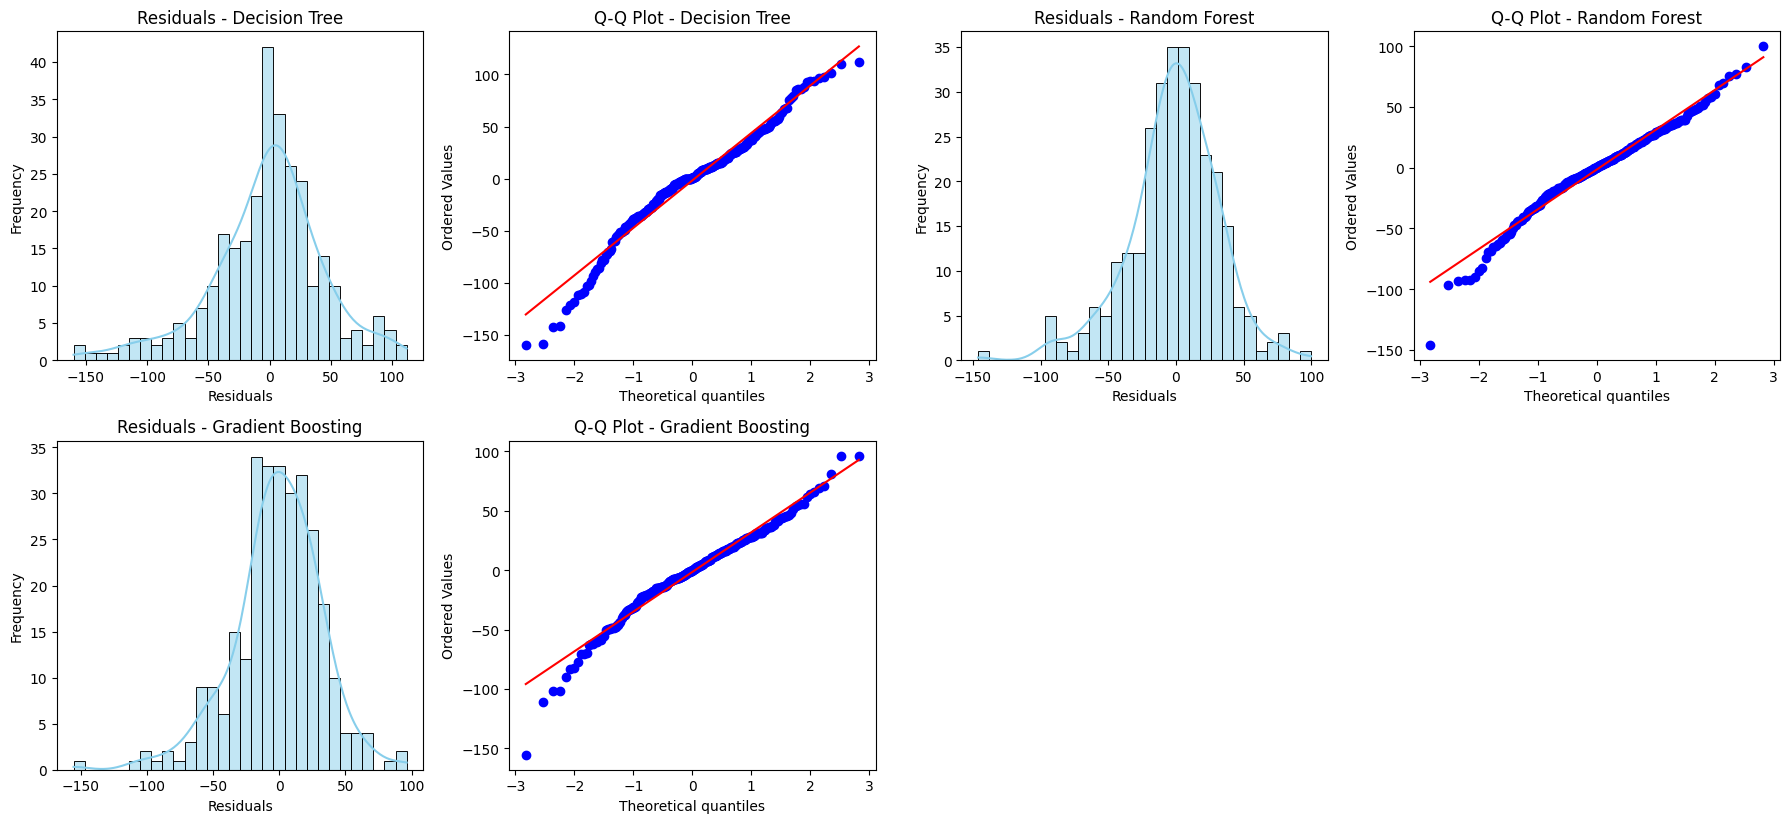

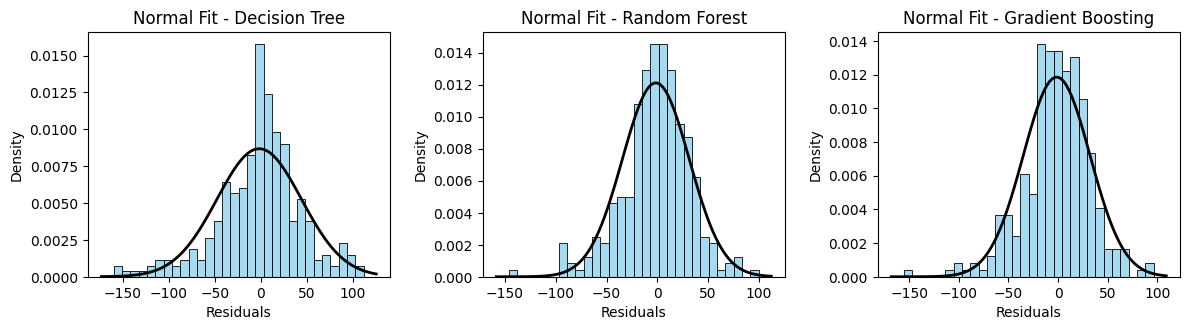

In [7]:
# Convert predictions to DataFrame (if not already done)
predictions_df = pd.DataFrame(predictions)
predictions_df["Actual PM2.5"] = y_test.values

# Step 1: Calculate residuals for each model (predicted - actual)
residuals = {}
for model_name in predictions_df.columns[:-1]:  # Exclude 'Actual PM2.5'
    residuals[model_name] = predictions_df[model_name] - predictions_df["Actual PM2.5"]

# Step 2: Statistical analysis using OLS regression and KS test for normality
ks_results = {}
ols_results = {}

for model_name, res in residuals.items():
    # KS Test for normality
    ks_stat, ks_p_value = stats.kstest(res, 'norm')
    ks_results[model_name] = ks_p_value
    
    # OLS regression on residuals (to detect any systematic pattern)
    res_df = pd.DataFrame(res, columns=[model_name])
    res_df.index = predictions_df.index  # Align indices with y_test
    X_res = sm.add_constant(res_df)
    ols_model = sm.OLS(predictions_df["Actual PM2.5"], X_res)
    ols_result = ols_model.fit()
    ols_results[model_name] = ols_result.rsquared  # Higher OLS R² means more pattern explained (less desirable)

#  Convert KS and OLS results to DataFrames for inspection
ks_df = pd.DataFrame(list(ks_results.items()), columns=["Model", "KS P-Value"])
ols_df = pd.DataFrame(list(ols_results.items()), columns=["Model", "OLS R²"])

# Step 3: Compute evaluation metrics for each model (MAE, RMSE, R²) and combine with KS and OLS results
metrics_results = []
for model_name in predictions_df.columns[:-1]:
    y_pred = predictions_df[model_name]
    y_true = predictions_df["Actual PM2.5"]
    
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    metrics_results.append({
        "Model": model_name,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2,
        "KS P-Value": ks_results.get(model_name),
        "OLS R²": ols_results.get(model_name)
    })

metrics_df = pd.DataFrame(metrics_results)

# Step 4: Determine the best model based on a combined Total Score
# For MAE and RMSE, lower is better, so we invert them.
# For R², KS P-Value, and OLS R², higher values are better.
metrics_df["Total Score"] = (
    1/metrics_df["MAE"] +
    1/metrics_df["RMSE"] +
    metrics_df["R²"] +
    metrics_df["KS P-Value"] +
    metrics_df["OLS R²"]
)

# Select the best model (highest Total Score)
best_model = metrics_df.loc[metrics_df["Total Score"].idxmax()]
print("\nBest Model Based on Combined Evaluation Metrics:")
print(best_model)

# Step 5: Plot Residual Histograms and Q-Q plots for each model
plt.figure(figsize=(18, 12))
for i, (model_name, res) in enumerate(residuals.items()):
    # Residual histogram with KDE
    plt.subplot(3, 4, 2 * i + 1)
    sns.histplot(res, kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Residuals - {model_name}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    
    # Q-Q plot for residuals
    plt.subplot(3, 4, 2 * i + 2)
    stats.probplot(res, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot - {model_name}')
plt.tight_layout()
plt.show()

# Step 6: Plot Normal Distribution Fit for Residuals
plt.figure(figsize=(12, 6))
for i, (model_name, res) in enumerate(residuals.items()):
    mu, std = stats.norm.fit(res)
    plt.subplot(2, 3, i+1)
    sns.histplot(res, kde=False, bins=30, color='skyblue', edgecolor='black', stat='density')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title(f'Normal Fit - {model_name}')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()


# graph of random forest

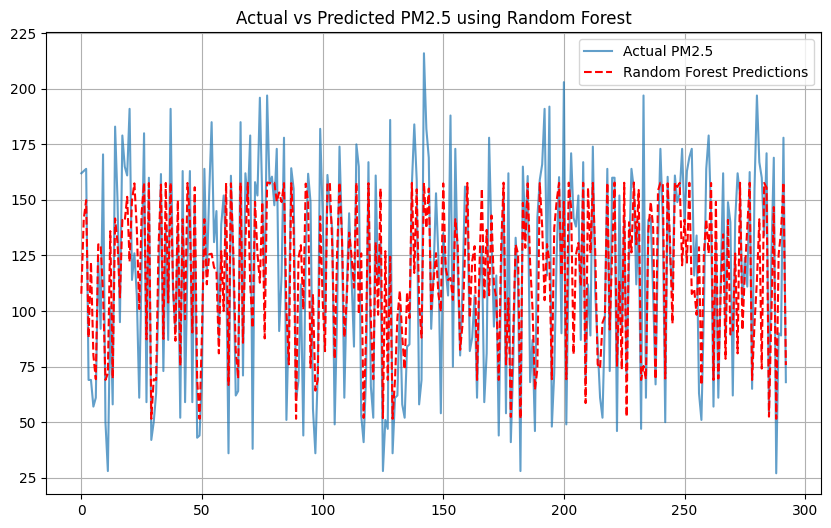

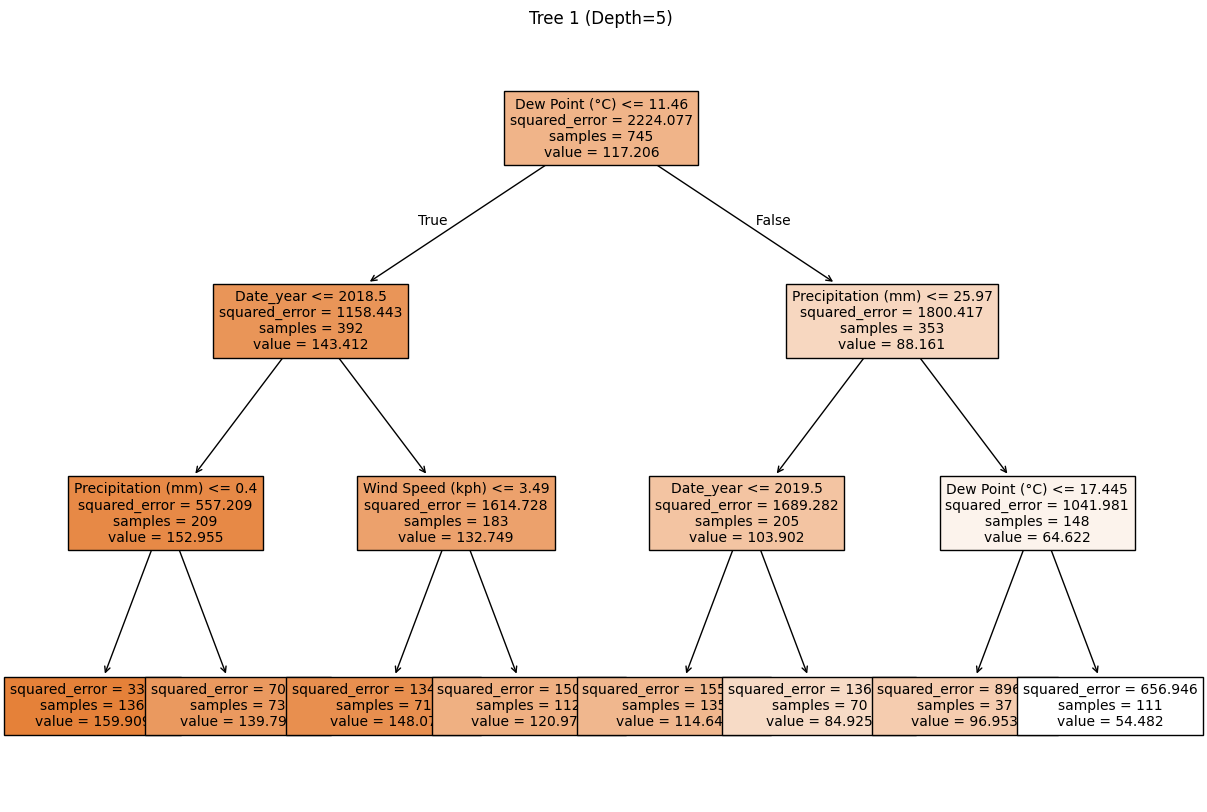

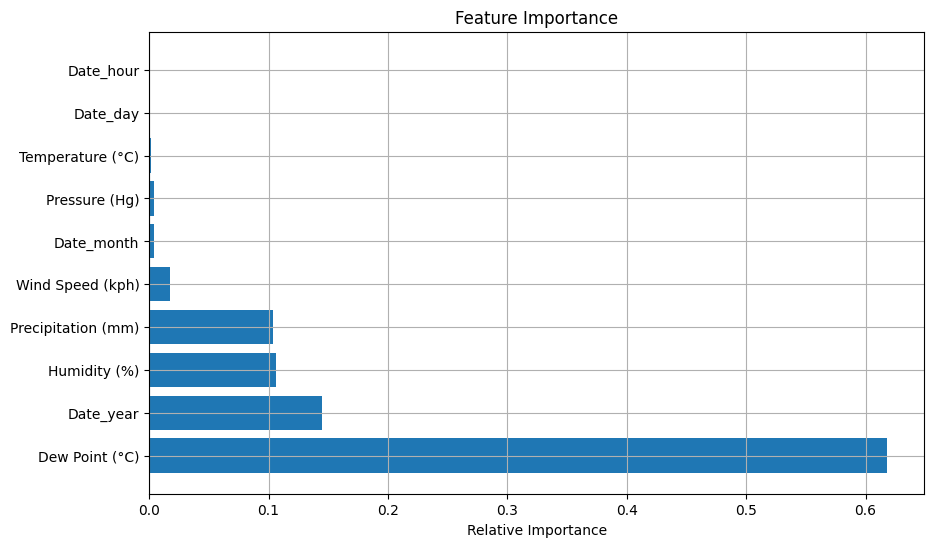

In [33]:
# Function to convert datetime columns into numerical features
def convert_datetime_columns(df):
    """Convert datetime columns into numerical features."""
    if isinstance(df, np.ndarray):  # Ensure df is a DataFrame
        return df  
    df = df.copy()
    datetime_cols = df.select_dtypes(include=['datetime64']).columns
    for col in datetime_cols:
        df[col + '_year'] = df[col].dt.year
        df[col + '_month'] = df[col].dt.month
        df[col + '_day'] = df[col].dt.day
        df[col + '_hour'] = df[col].dt.hour
        df.drop(columns=[col], inplace=True)  # Drop original datetime column
    return df

# Load data (Assuming 'data' is already loaded)
target_column = "PM2.5"  # Set your target variable
X = data.drop(columns=[target_column])  # Features
y = data[target_column]  # Target

# Convert datetime columns if needed
X = convert_datetime_columns(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure X_train and X_test remain DataFrames (not converted into NumPy arrays)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Train Random Forest with more advanced parameters and reduced depth/leaf size
rf_model = RandomForestRegressor(n_estimators=100, 
                                 max_depth=3,  # Reduced depth
                                 min_samples_leaf=5,  # Minimum samples per leaf
                                 random_state=42, 
                                 n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predict values
y_pred_rf = rf_model.predict(X_test)

# Estimate uncertainty (standard deviation of predictions from each tree)
y_pred_rf_std = np.vstack([tree.predict(X_test) for tree in rf_model.estimators_]).std(axis=0)

# Function to evaluate the model without printing the results
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Evaluate the Random Forest model without printing results
mae, rmse, r2 = evaluate_model(y_test, y_pred_rf)

# Convert y_test to NumPy array for plotting
y_test_np = np.array(y_test)

# Plot results of Actual vs Predicted PM2.5
plt.figure(figsize=(10, 6))
plt.plot(y_test_np, label='Actual PM2.5', alpha=0.7)
plt.plot(y_pred_rf, label='Random Forest Predictions', linestyle='--', color='red')
plt.title('Actual vs Predicted PM2.5 using Random Forest')
plt.legend()
plt.grid(True)
plt.show()

# Visualize a single tree
if len(rf_model.estimators_) > 0:
    plt.figure(figsize=(15, 10))
    plot_tree(rf_model.estimators_[0], filled=True, feature_names=X_train.columns, fontsize=10, max_depth=5)
    plt.title("Tree 1 (Depth=5)")
    plt.show()

# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), X_train.columns[indices])
plt.xlabel("Relative Importance")
plt.grid(True)
plt.show()

# Suppress warnings about feature names (optional)
warnings.filterwarnings("ignore", message=".*has feature names, but.*")


# graph of decision tree model

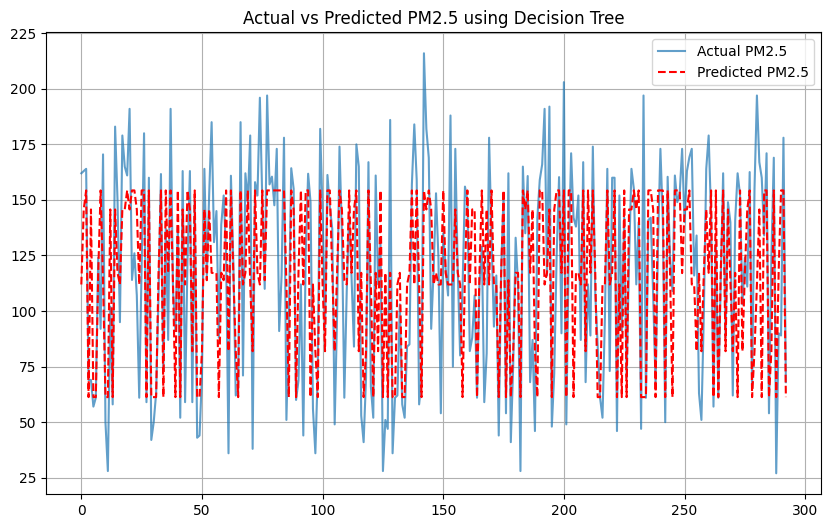

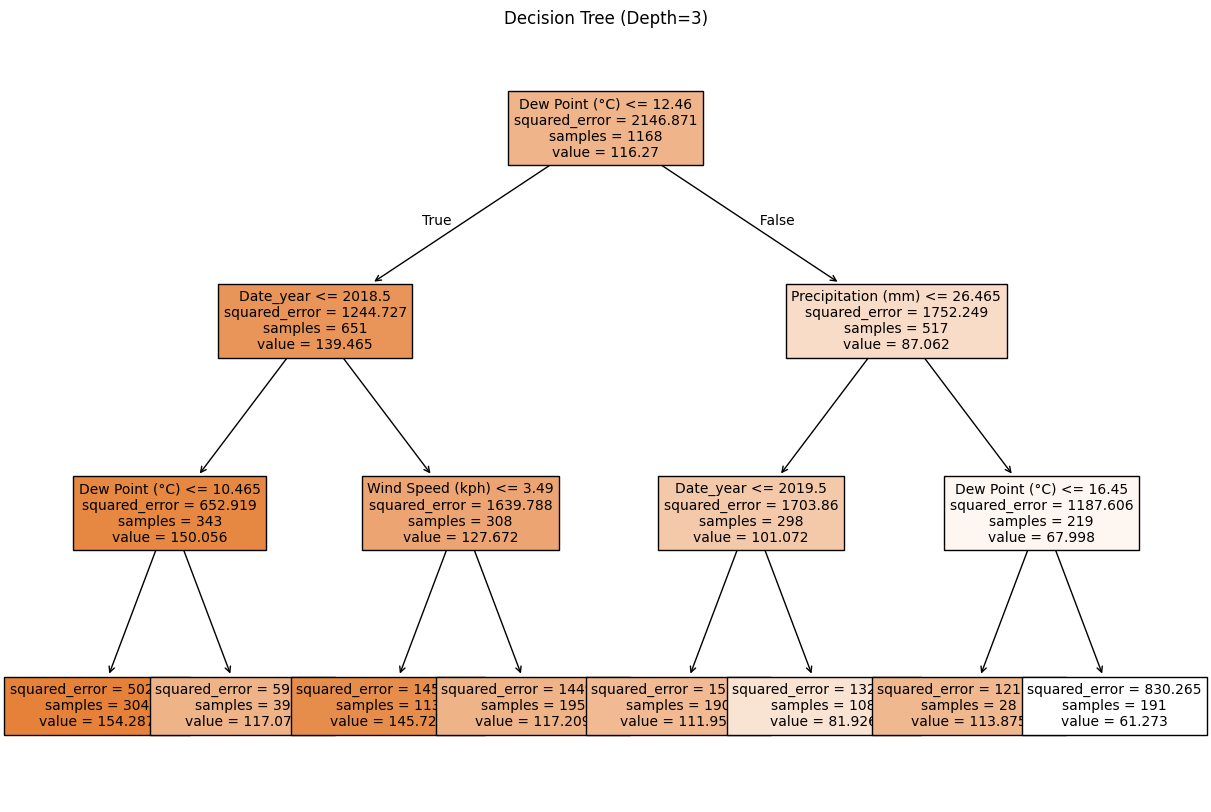

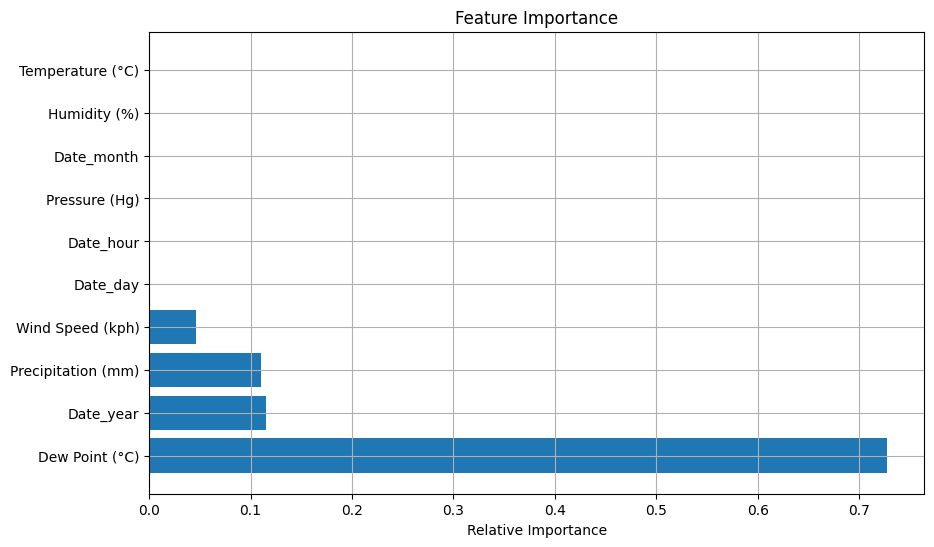

In [34]:
# Function to convert datetime columns into numerical features
def convert_datetime_columns(df):
    """Convert datetime columns into numerical features."""
    if isinstance(df, np.ndarray):  # Ensure df is a DataFrame
        return df  
    df = df.copy()
    datetime_cols = df.select_dtypes(include=['datetime64']).columns
    for col in datetime_cols:
        df[col + '_year'] = df[col].dt.year
        df[col + '_month'] = df[col].dt.month
        df[col + '_day'] = df[col].dt.day
        df[col + '_hour'] = df[col].dt.hour
        df.drop(columns=[col], inplace=True)  # Drop original datetime column
    return df

# Prepare features and target
target_column = "PM2.5"  # Set your target variable
X = data.drop(columns=[target_column])  # Features
y = data[target_column]  # Target

# Convert datetime columns if needed
X = convert_datetime_columns(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure X_train and X_test remain DataFrames (not converted into NumPy arrays)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Train Decision Tree Regressor with more advanced parameters and reduced depth/leaf size
dt_model = DecisionTreeRegressor(max_depth=3,  # Reduced depth
                                 min_samples_leaf=5,  # Minimum samples per leaf
                                 random_state=42)
dt_model.fit(X_train, y_train)

# Predict values
y_pred_dt = dt_model.predict(X_test)

# Estimate uncertainty (standard deviation of predictions from each tree, for Decision Tree this is a bit different)
# Here, we use the tree predictions directly as there are no "estimators" like in random forests.
y_pred_dt_std = np.zeros(len(y_pred_dt))  # Decision Tree doesn't provide multiple trees for uncertainty estimation

# Function to evaluate the model without printing the results
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Evaluate the Decision Tree model without printing results
mae, rmse, r2 = evaluate_model(y_test, y_pred_dt, "Decision Tree")

# Convert y_test to NumPy array for plotting
y_test_np = np.array(y_test)

# Plot Actual vs Predicted PM2.5
plt.figure(figsize=(10, 6))
plt.plot(y_test_np, label='Actual PM2.5', alpha=0.7)
plt.plot(y_pred_dt, label='Predicted PM2.5', linestyle='--', color='red')
plt.title('Actual vs Predicted PM2.5 using Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, fontsize=10, max_depth=3)
plt.title(f"Decision Tree (Depth=3)")
plt.show()

# Feature Importance
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), X_train.columns[indices])
plt.xlabel("Relative Importance")
plt.grid(True)
plt.show()

# Suppress warnings about feature names (optional)
warnings.filterwarnings("ignore", message=".*has feature names, but.*")


# graph of gradient boosting model

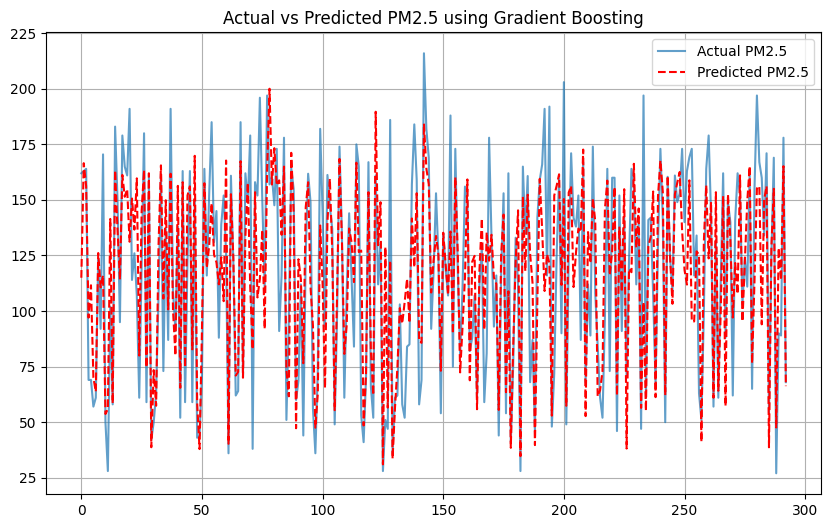

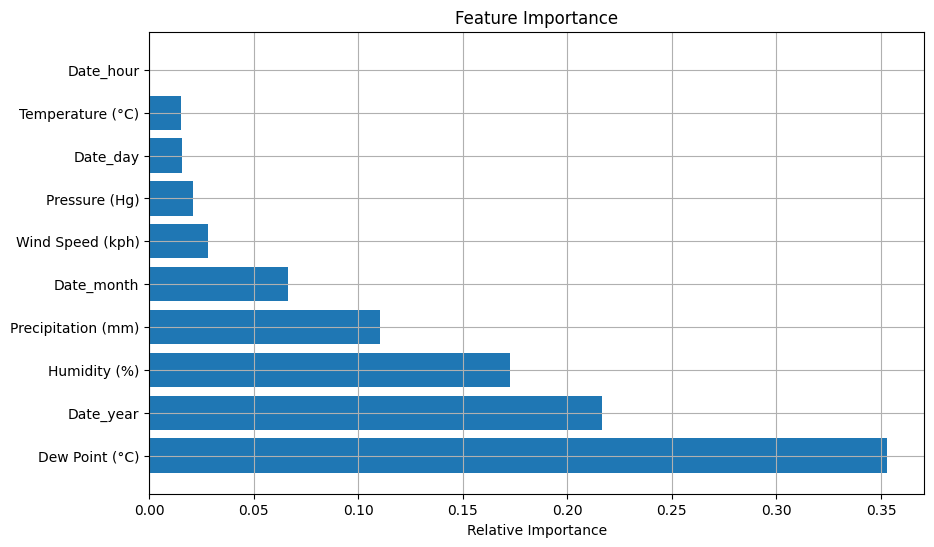

In [35]:
# Function to convert datetime columns into numerical features
def convert_datetime_columns(df):
    """Convert datetime columns into numerical features."""
    if isinstance(df, np.ndarray):  # Ensure df is a DataFrame
        return df  
    df = df.copy()
    datetime_cols = df.select_dtypes(include=['datetime64']).columns
    for col in datetime_cols:
        df[col + '_year'] = df[col].dt.year
        df[col + '_month'] = df[col].dt.month
        df[col + '_day'] = df[col].dt.day
        df[col + '_hour'] = df[col].dt.hour
        df.drop(columns=[col], inplace=True)  # Drop original datetime column
    return df

# Prepare features and target
target_column = "PM2.5"  # Set your target variable
X = data.drop(columns=[target_column])  # Features
y = data[target_column]  # Target

# Convert datetime columns if needed
X = convert_datetime_columns(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Regressor with advanced parameters
gb_model = GradientBoostingRegressor(n_estimators=100,  # Number of boosting stages
                                     max_depth=3,       # Maximum depth of the tree
                                     learning_rate=0.1, # Step size shrinking to prevent overfitting
                                     random_state=42)
gb_model.fit(X_train, y_train)

# Predict values
y_pred_gb = gb_model.predict(X_test)

# Function to evaluate the model without printing the results
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Evaluate the Gradient Boosting model without printing results
mae, rmse, r2 = evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

# Convert y_test to NumPy array for plotting
y_test_np = np.array(y_test)

# Plot Actual vs Predicted PM2.5
plt.figure(figsize=(10, 6))
plt.plot(y_test_np, label='Actual PM2.5', alpha=0.7)
plt.plot(y_pred_gb, label='Predicted PM2.5', linestyle='--', color='red')
plt.title('Actual vs Predicted PM2.5 using Gradient Boosting')
plt.legend()
plt.grid(True)
plt.show()

# Feature Importance
importances = gb_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), X_train.columns[indices])
plt.xlabel("Relative Importance")
plt.grid(True)
plt.show()

# Suppress warnings about feature names (optional)
warnings.filterwarnings("ignore", message=".*has feature names, but.*")


# best model selection


Best model based on MAE: Random Forest


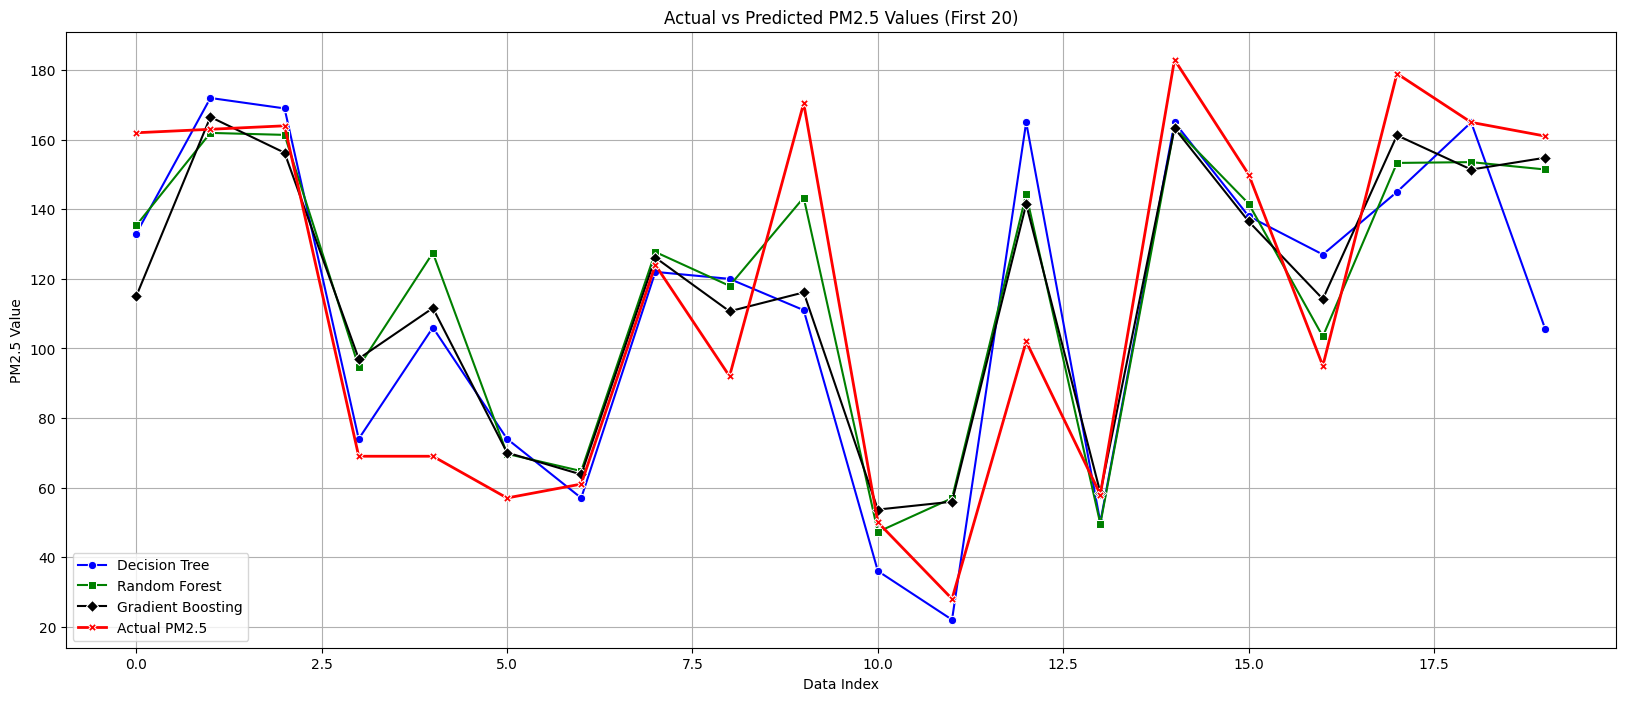

In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models and predict PM2.5 values
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

predictions = {}
results = []  # Store model evaluation metrics

# Train each model and store its predictions & evaluation results
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Append results to the list
    results.append({"Model": model_name, "MAE": mae, "RMSE": rmse, "R²": r2})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Select the best model based on a specific criterion (Example: MAE, RMSE, or R²)
criterion = "MAE"  # Change to "RMSE" or "R²" based on your preference
best_model = results_df.loc[results_df[criterion].idxmin()] if criterion in ["MAE", "RMSE"] else results_df.loc[results_df[criterion].idxmax()]

print(f"\nBest model based on {criterion}: {best_model['Model']}")

# Convert predictions to DataFrame
predictions_df = pd.DataFrame(predictions)
predictions_df["Actual PM2.5"] = y_test.values

# Extract the first 20 rows of predictions and actual PM2.5 values
predictions_subset = predictions_df.iloc[:20]
y_true_subset = predictions_subset["Actual PM2.5"]

# Plot the results for the first 20 predictions
plt.figure(figsize=(20, 8))

sns.lineplot(data=predictions_subset["Decision Tree"], label="Decision Tree", color="blue", marker="o")
sns.lineplot(data=predictions_subset["Random Forest"], label="Random Forest", color="green", marker="s")
sns.lineplot(data=predictions_subset["Gradient Boosting"], label="Gradient Boosting", color="black", marker="D")
sns.lineplot(data=y_true_subset, label="Actual PM2.5", color="red", marker="X", linewidth=2)

plt.xlabel("Data Index")
plt.ylabel("PM2.5 Value")
plt.title("Actual vs Predicted PM2.5 Values (First 20)")
plt.legend()
plt.grid(True)
plt.show()
